<center><h1>Anne_Sai Venkata Naga Saketh_HW2</h1></center>
<br>
<br>

Name: Anne Sai Venkata Naga Saketh
<br>
Github Username: sakethanne
<br>
USC ID: 3725520208

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
#all the import statements that shall be required during this assignment are mentioned here in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Get the Cycle Power Plant Data Set

In [2]:
#Path to your Excel file containing the relavant data to predict the EP output
excel_file = '../data/CCPP/Folds5x2_pp.xlsx'

df = pd.read_excel(excel_file, sheet_name='Sheet1')

### (b) Exploring the data

#### i. rows and columns

In [3]:
# the data frame containing the data from all the sheets from the given data set is called 'df'
#finding the number of rows
num_rows = df.shape[0]
print("Number of rows:", num_rows)
#finding the number of columns
num_cols = df.shape[1]
print("Number of columns:", num_cols)

Number of rows: 9568
Number of columns: 5


<p>The rows and columns in the dataset from the Combined Cycle Power Plant correspond to the following:

Rows: A data point from the Combined Cycle Power Plant is represented by each row in the dataset. These data were gathered over a 6 year period (2006–2011) while the power plant was running at full capacity. According to the dataset description, each row belongs to a particular time interval, perhaps hourly.

The dataset is divided into columns, each of which represents a separate feature that is measured when the power plant is in operation.

The Independent variables (features) are:
   1. Temperature (T): This column shows the hourly average ambient temperature.
   2. Ambient Pressure (AP): This column shows the hourly average ambient pressure.
   3. Relative Humidity (RH): This column shows the hourly average relative humidity.
   4. Exhaust Vacuum (V): This column displays the exhaust vacuum level

Target Dependent Variable:
   1. Net Hourly Electrical Energy Output (EP): This is the variable we shall be predicting, which is the power plant's net hourly electrical energy output.</p>

#### ii. pairwise scatterplots of all the varianbles

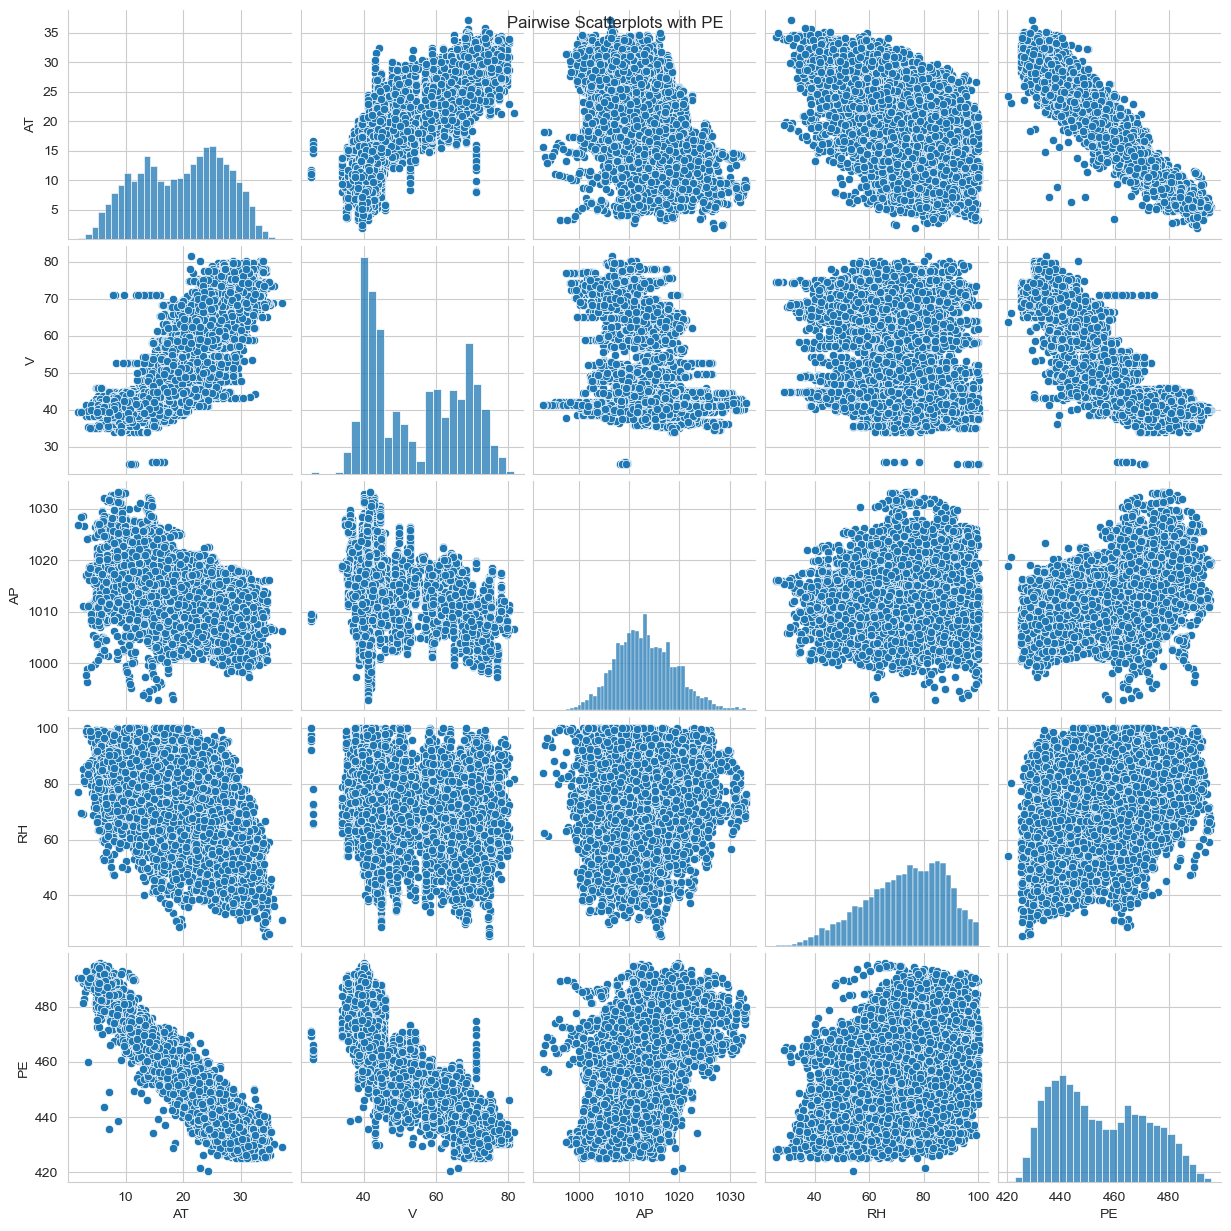

In [4]:
sns.set_style("whitegrid")
# Creating a pairwise scatterplots using seaborn's pairplot function and using the PE column as the hue for color differentiation
sns.pairplot(df)

# Adding a title to the pairplot graph
plt.suptitle("Pairwise Scatterplots with PE")

# Displaying the pairplot graph
plt.show()

We draw the following conclusions about the relationships between the variables in the dataset - 

Temperature (AT) vs. Energy output (PE): The relationship between temperature (AT) and net hourly electrical energy output (PE) appears to be moderately negative. PE tends to decline with rising temperature.

Ambient Pressure (AP) vs. Energy output (PE): The link between ambient pressure (AP) and PE doesn't appear to be very linear. A comparatively uniform distribution of data points can be seen in the scatterplot.

Exhaust Vacuum (V) in comparison to PE: Exhaust vacuum (V) and net hourly electrical energy output (PE) show a clear negative association. PE tends to decrease as exhaust vacuum rises.

PE against PE (Diagonal): The distributions of the various variables are shown in the diagonal charts. These charts show the PE distribution, which seems to be somewhat normal.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
# Decalre a daictionary to store the statistical values that shall be computed. We will convert this dictoinary into a dataframe and print it
statistics = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Range': [],
    '1st Quartile (Q1)': [],
    '3rd Quartile (Q3)': [],
    'Interquartile Range (IQR)': []
}

# Looping through each of the variables in the dataframe and computing the statistical values for them
for variable in df.columns:
    mean = df[variable].mean()
    median = df[variable].median()
    data_range = df[variable].max() - df[variable].min()
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1

    # Appending the statistical values to the dictionary that has been declared
    statistics['Variable'].append(variable)
    statistics['Mean'].append(mean)
    statistics['Median'].append(median)
    statistics['Range'].append(data_range)
    statistics['1st Quartile (Q1)'].append(q1)
    statistics['3rd Quartile (Q3)'].append(q3)
    statistics['Interquartile Range (IQR)'].append(iqr)

# Createing a summary DataFrame (converting the dictionary into a dataframe)
summary_df = pd.DataFrame(statistics)

# Printing the summary table
summary_df

,Variable,Mean,Median,Range,1st Quartile (Q1),3rd Quartile (Q3),Interquartile Range (IQR)
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

Regression Results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:52:57   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341    

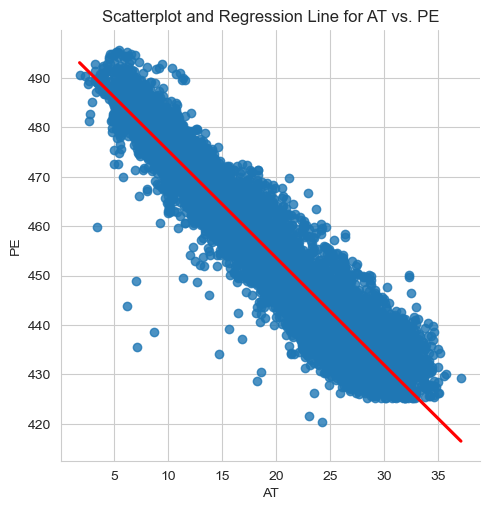

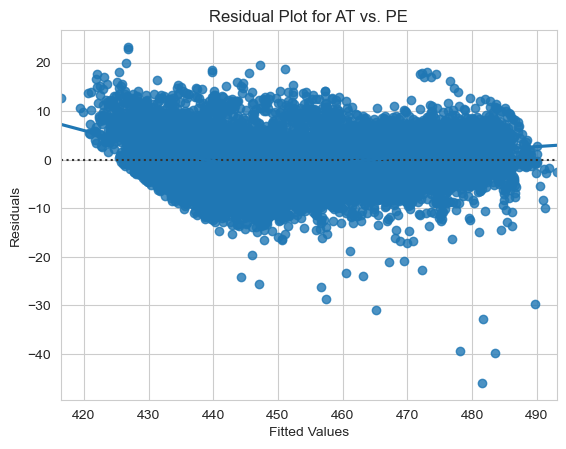

Regression Results for AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:52:58   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610    

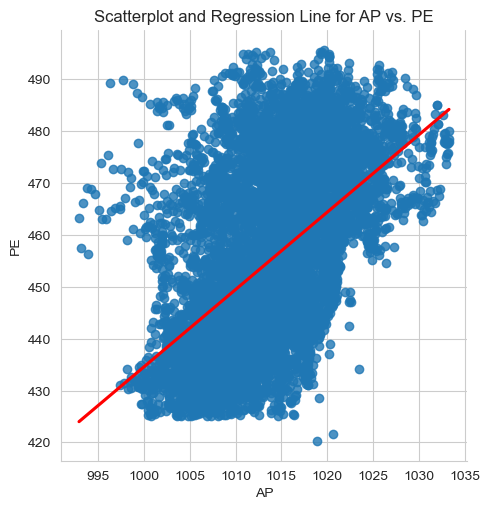

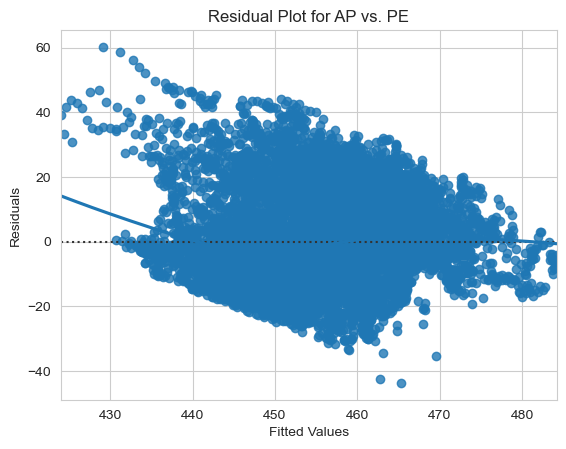

Regression Results for RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:52:59   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618    

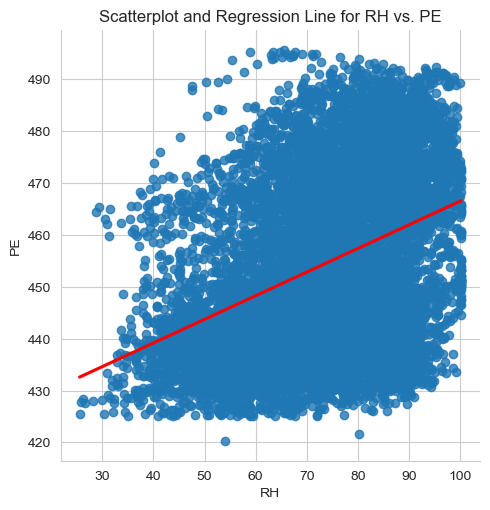

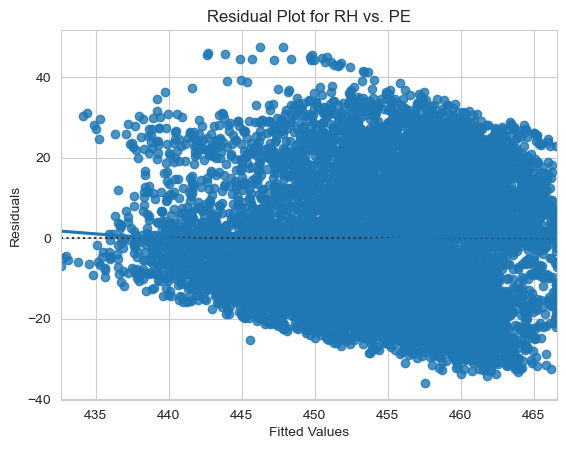

Regression Results for V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:53:00   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015     

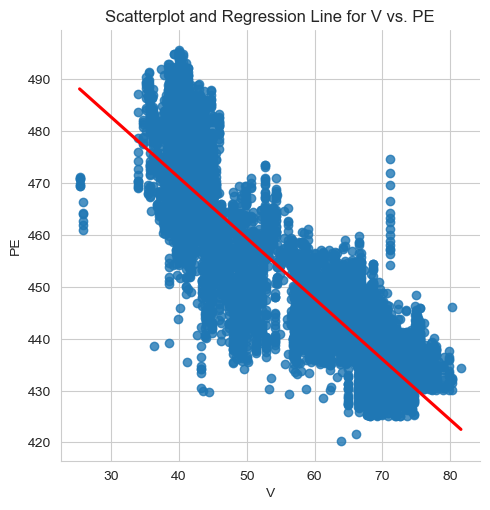

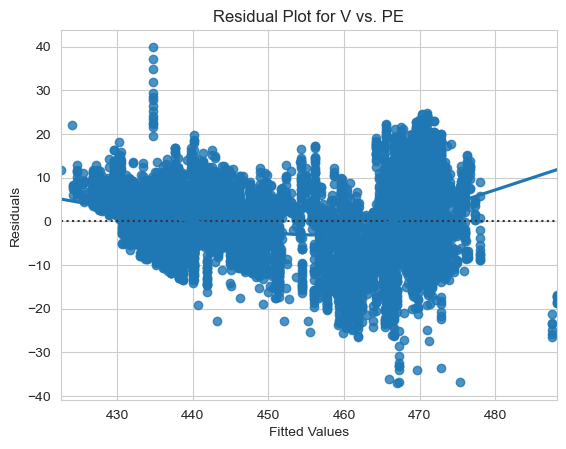

Predictors with statistically significant associations with EP: ['AT', 'AP', 'RH', 'V']


In [6]:
# List of predictor variables (independent variables) from the dataset are taken into a list
predictor_variables = ['AT', 'AP', 'RH', 'V']

# Creating a dictionary to store regression results
regression_results = {}

# Looping through each predictor variable from the predictor_variables list
for predictor in predictor_variables:
    # Fit a simple linear regression model
    # Predictor variable
    X = df[predictor]
    
    # Adding a constant (intercept) term to the model
    X = sm.add_constant(X)
    
    # Response variable
    y = df['PE']  

    # Fitting the regression model
    model = sm.OLS(y, X).fit()
    regression_results[predictor] = model

    # Printing summary statistics of the regression model
    print(f"Regression Results for {predictor}:\n{model.summary()}\n")

    # Create a scatterplot with regression line
    sns.lmplot(x=predictor, y='PE', data=df, ci=None, line_kws={'color': 'red'})
    
    # Adding a title for the scatter plot
    plt.title(f"Scatterplot and Regression Line for {predictor} vs. PE")
    
    #Adding the labels for the axes on the scatter plot
    plt.xlabel(predictor)
    plt.ylabel('PE')
    
    #Displaying the Scatter plot graph
    plt.show()

    #Checking for outlier data using a residual plot
    sns.residplot(x=model.fittedvalues, y=model.resid, data=df, lowess=True)
    
    #Adding a title for the residual graph
    plt.title(f"Residual Plot for {predictor} vs. PE")
    
    #Adding labels for the axes in the residual graphs
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    
    #Displaying the residual graph
    plt.show()

# Computing the statistically significant associations of the dependent variable with the independednt variables.
significant_predictors = []

# Looping through the predictor and the models generated, and comparing the p-value to check if they are statistically significant associations
for predictor, model in regression_results.items():
    p_value = model.pvalues[predictor]
    
    # Checking if the p-value is than 0.05
    if p_value < 0.05:  
        significant_predictors.append(predictor)

# Displaying the significant associations
print(f"Predictors with statistically significant associations with EP: {significant_predictors}")

The p-value is used to decide to check if there is a significant association with the target variable, here we can see that for the 4 different independent variables the p-value is less than 0.05. Hence we can cconfidnetly say that all the 4 variables AP, AT, RH and V have a significant association with the Dependent variable (PE).


Yes, we use the residual graphs to find the outliers for a given variable (a column or a feature)

An outlier is a point that is a recorded data point, which is outside the cluster, so that data point is called as a outlier.

We can clearly see that there are a couple of points that are actually outside of the cluster for each of the residual plot vs the fitted points (fitted values).

### (d) Multiple Regression

In [7]:
# List of predictor variables (independent variables) from the dataset are taken into a list
predictor_variables = ['AT', 'AP', 'RH', 'V']

# Adding a constant (intercept) term to the predictors
X = df[predictor_variables]
X = sm.add_constant(X)

# Defining the response variable (dependent variable)
y = df['PE']

# Fitting the multiple regression model
model = sm.OLS(y, X).fit()

# Printing the summary statistics of the multiple regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:53:01   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

If the p-value for a variable is less than your significance level (here in our case we have taken the p-value to be '0.05'), The data can provide enough evidence to reject the null hypothesis for the entire population.

In our case, the p-value is as follows fot the following variables
1. AT - 0.00
2. AP - 0.00
3. RH - 0.00
4. V - 0.00

Since, for all the variables, the p-value is less than 0.05, we can <b> reject the Null hypothesis for all the 4 predictors (AP, AT, RH and V) </b>

### (e) 1c Compare to 1d

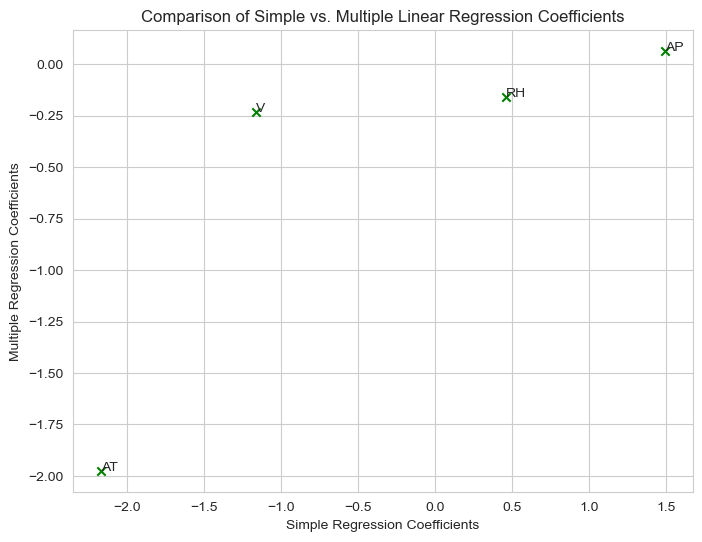

In [8]:
# List of predictor variables (independent variables) from the dataset are taken into a list
predictor_variables = ['AT', 'AP', 'RH', 'V']

# Initializing the lists to store simple and multiple regression coefficients
simple_regression_coeffs = []
multiple_regression_coeffs = []

# Looping through each of the predictor variable
for predictor in predictor_variables:
    
    # Generating the Simple linear regression models for each predictor
    X_simple = sm.add_constant(df[predictor])
    y_simple = df['PE']
    model_simple = sm.OLS(y_simple, X_simple).fit()
    simple_regression_coeffs.append(model_simple.params[predictor])
    
    # Generating the Multiple linear regression model for all the predictors available
    X_multiple = sm.add_constant(df[predictor_variables])
    model_multiple = sm.OLS(y_simple, X_multiple).fit()
    multiple_regression_coeffs.append(model_multiple.params[predictor])

# Creating a scatter plot and plotting the univariate regression co-efficients
plt.figure(figsize=(8, 6))
plt.scatter(simple_regression_coeffs, multiple_regression_coeffs, marker='x', color='green')

# Adding the title and the axes labels for the scatter plot
plt.title("Comparison of Simple vs. Multiple Linear Regression Coefficients")
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")

# Enabling the background grid for the scatter plot so that we can distinguish the points
plt.grid(True)

# Annotating the labels for the different predictor variables to be shown on the graph
for i, predictor in enumerate(predictor_variables):
    plt.annotate(predictor, (simple_regression_coeffs[i], multiple_regression_coeffs[i]), fontsize=10)

# Displaying the scatter plot
plt.show()

If we see the above the graph and the co-efficient differences we cn notice the following things.

1. For the feature/variable AT: The Regression co-efficient has increased from -2.17 in Simple Regression to -1.97 Multiple Regression.

2. For the feature/variable AP: The Regression co-efficient has decreased from 1.49 in Simple Regression to 0.06 Multiple Regression.

3. For the feature/variable RH: The Regression co-efficient has decreased from 0.46 in Simple Regression to -0.16 Multiple Regression.

4. For the feature/variable V: The Regression co-efficient has increased from -1.17 in Simple Regression to -0.23 Multiple Regression.

### (f) Nonlinear Association

In [9]:
# List of predictor variables (independent variables) from the dataset are taken into a list
predictor_variables = ['AT', 'AP', 'RH', 'V']

# Defining the degree of the polynomial equation, since in the question we were asked to fit the model in to a cubic equation, we are using a degree of 3
degree = 3

# Initializing the lists to store polynomial regression results
polynomial_regression_results = []

# Looping through each predictor variable available
for predictor in predictor_variables:
    X = df[predictor]
    
    # Creating a matrix with X, X^2, and X^3
    X_poly = np.column_stack([X, X**2, X**3])  
    
    # Adding a constant value to the predictors
    X_poly = sm.add_constant(X_poly)
    
    # Defining the response variable
    y = df['PE']
    
    # Fitting a polynomial regression model (Y = β0 + β1X + β2X^2 + β3X^3 + ε)
    model = sm.OLS(y, X_poly).fit()
    polynomial_regression_results.append((predictor, model))
    
    # Print summary statistics of the polynomial regression model
    print(f"Polynomial Regression Results for {predictor}:\n{model.summary()}\n")

Polynomial Regression Results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:53:01   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4

To check that there is an evidence of non-linear association between any of the predictors and the target variable, we fit each of the predictor into a polynomial equation of degree 3 as per the given question.

For each predictor we observe the following things for the x1, x2 and x3 values:
1. For Predictor 'AT': All the three variables x1, x2, and x3 and the constant have a statistic significance to the model, hence we can conclude that there is a non-linear association. i.e., having these terms in the equation increases the model fitment into the data.

2. For Predictor 'AP': All the three variables x1, x2, and x3 and the constant have a statistic significance to the model, hence we can conclude that there is a non-linear association. i.e., having these terms in the equation increases the model fitment into the data.

3. For Predictor 'RH': All the three variables x1, x2, and x3 and the constant have a statistic significance to the model, hence we can conclude that there is a non-linear association. i.e., having these terms in the equation increases the model fitment into the data.

4. For Predictor 'V': The TWO variables x1, and x3 and the constant have a statistic significance to the model, but we can clearly see that the variable x2 has a p-value of more than 0.05 (0.768), which means that it is not statistically significant and does not have any positive effect on the model fitment. Hence we can say that there is no non-linear association for the predictor 'V'.

### (g) Interactions of Predictors

In [10]:
# List of predictor variables (independent variables) from the dataset are taken into a list
predictor_variables = ['AT', 'AP', 'RH', 'V']

# Creating a copy of the dataset with interaction terms
interaction_data = df.copy()

# Adding pairwise interaction terms to the dataset
for i in range(len(predictor_variables)):
    for j in range(i + 1, len(predictor_variables)):
        predictor_i = predictor_variables[i]
        predictor_j = predictor_variables[j]
        interaction_data[f'{predictor_i}_{predictor_j}'] = df[predictor_i] * df[predictor_j]

# Defining the response variable
y = df['PE']

# Adding a constant value to the predictors
X = sm.add_constant(interaction_data.drop(columns=['PE']))

# Fitting the multiple linear regression model with interaction terms
model = sm.OLS(y, X).fit()

# Print summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:53:01   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

From the model summary, we can see that the results of the pairwise interaction between the predictors.

And, as we already know that if the p-value of a interaction/predictor variable is more than 0.05, then we can say that the variable/predictor is not statistically significant to the model.

<b>If we check the model summary, for the following terms, we see that they are statistically significant to the model, they are - </b>
1. Constant
2. single predictor AP
3. single predictor RH
4. single predictor V
5. pairwise interaction between AT and RH
6. pairwise interaction between AT and V
7. pairwise interaction between AP and RH
8. pairwise interaction between AP and V

<b>But for the following variables and pairwise interactions the p-value is greater tha 0.05, so we can conclude that this variable doesnot have any statistical significance to the model. they are - </b>
    
1. pairwise interaction between AT and AP
2. pairwise interaction between RH and V
3. single predictor AT


### (h) Improvement

In [11]:
# List of predictor variables (independent variables) from the dataset are taken into a list
predictor_variables = ['AT', 'AP', 'RH', 'V']

# Defining the response variable
response_variable = 'PE'

# Creating interaction terms and quadratic nonlinearities for all predictors
interaction_data = df.copy()
for predictor in predictor_variables:
    interaction_data[f'{predictor}_squared'] = interaction_data[predictor] ** 2

# Spliting the data into a training set and testing set
train_data, test_data = train_test_split(interaction_data, test_size=0.3, random_state=35)

# Training a regression model with all predictors on the training set
X_train_all = sm.add_constant(train_data[predictor_variables])
y_train = train_data[response_variable]
model_all = sm.OLS(y_train, X_train_all).fit()

# Train a regression model with interaction terms and quadratic non linearities in the training set
X_train_interaction = sm.add_constant(train_data.drop(columns=[response_variable]))
model_interaction = sm.OLS(y_train, X_train_interaction).fit()

# Identifying and removing and insignificant variables and the interaction terms based on p-values from the model summary generated
significant_predictors = model_interaction.pvalues[model_interaction.pvalues < 0.05].index
X_train_interaction_filtered = X_train_interaction[significant_predictors]

# Testing both the models on the testing set and calculate MSEs
X_test_all = sm.add_constant(test_data[predictor_variables])
y_test = test_data[response_variable]
y_pred_all = model_all.predict(X_test_all)
mse_all = mean_squared_error(y_test, y_pred_all)

X_test_interaction = sm.add_constant(test_data.drop(columns=[response_variable]))
X_test_interaction_filtered = X_test_interaction[significant_predictors]
y_pred_interaction = model_interaction.predict(X_test_interaction)
mse_interaction = mean_squared_error(y_test, y_pred_interaction)

# Testing both the models on the training set and calculate MSEs
X_train_all = sm.add_constant(train_data[predictor_variables])
y_train = train_data[response_variable]
y_train_all = model_all.predict(X_train_all)
mse_train_all = mean_squared_error(y_train, y_train_all)

X_train_interaction = sm.add_constant(train_data.drop(columns=[response_variable]))
X_train_interaction_filtered = X_train_interaction[significant_predictors]
y_train_interaction = model_interaction.predict(X_train_interaction)
mse_interaction_train = mean_squared_error(y_train, y_train_interaction)

# Printing the Train MSEs for both models
print(f"\nMean Squared Error (MSE) for Model with All Predictors on Training Data: {mse_train_all:2f}")
print(f"\nMean Squared Error (MSE) for Model with Interaction Terms and Quadratic Nonlinearities on Training Data: {mse_interaction_train:2f}")

# Printing the Test MSEs for both models
print(f"\nMean Squared Error (MSE) for Model with All Predictors on Test Data: {mse_all:2f}")
print(f"\nMean Squared Error (MSE) for Model with Interaction Terms and Quadratic Nonlinearities on Test Data: {mse_interaction:2f}")


Mean Squared Error (MSE) for Model with All Predictors on Training Data: 20.734904

Mean Squared Error (MSE) for Model with Interaction Terms and Quadratic Nonlinearities on Training Data: 18.368109

Mean Squared Error (MSE) for Model with All Predictors on Test Data: 20.863553

Mean Squared Error (MSE) for Model with Interaction Terms and Quadratic Nonlinearities on Test Data: 18.524998


### (i) KNN

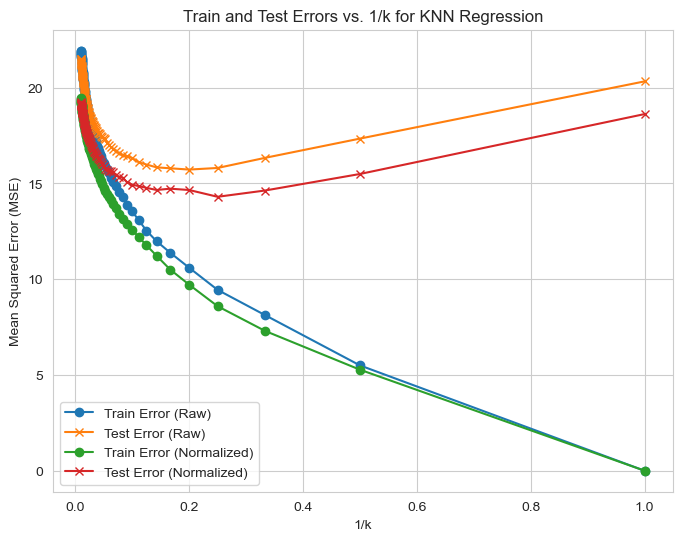

Best K Value [Raw] {5}
Best K Value [Normalized] {4}


In [12]:
# List of predictor variables (independent variables) from the dataset are taken into a list
predictor_variables = ['AT', 'AP', 'RH', 'V']

# Defining the response variable from the dataset
response_variable = 'PE'

# Spliting the data into a training set and a testing set
X = df[predictor_variables]
y = df[response_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing lists to store train and test errors from the models that shall be generated
train_errors_raw = []
test_errors_raw = []
train_errors_normalized = []
test_errors_normalized = []

# Defining a range of values for k from 1 to 100
list_k = range(1, 101)

# Looping through each value of k and setting the number of neighbours as 'k'
for k in list_k:
    # Generating the model fitment with the Raw Features KNN Regression
    # Since we need to generate the models for RAW data and also Normalized Data, we use the '_r' suffix for all the variables for the raw data and
    # we use the '_n' suffix for the variables names that are for the normalized regression using the scaler library
    knn_r = KNeighborsRegressor(n_neighbors=k)
    knn_r.fit(X_train, y_train)
    y_train_pred_r = knn_r.predict(X_train)
    y_test_pred_r = knn_r.predict(X_test)
    
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_r))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_r))
    
    # As a next step we need to normalize the features of the KNN regression using the standard scaler library and running it on the same test and train data 
    scaler = StandardScaler()
    X_train_n = scaler.fit_transform(X_train)
    X_test_n = scaler.transform(X_test)
    
    knn_n = KNeighborsRegressor(n_neighbors=k)
    knn_n.fit(X_train_n, y_train)
    y_train_pred_n = knn_n.predict(X_train_n)
    y_test_pred_n = knn_n.predict(X_test_n)
    
    train_errors_normalized.append(mean_squared_error(y_train, y_train_pred_n))
    test_errors_normalized.append(mean_squared_error(y_test, y_test_pred_n))

# Now that we have the test and the train errors for all the RAW and the Normalized models, we need to plot the values in terms on 1/k as per the given question.

# Defining the plot size
plt.figure(figsize=(8, 6))

# Plotting all the four different corresponding points on the graph
# All the test errors are represented by the marker 'x' and the training errors are represented by the marker 'o'
plt.plot(1 / np.array(list_k), train_errors_raw, label='Train Error (Raw)', marker='o')
plt.plot(1 / np.array(list_k), test_errors_raw, label='Test Error (Raw)', marker='x')
plt.plot(1 / np.array(list_k), train_errors_normalized, label='Train Error (Normalized)', marker='o')
plt.plot(1 / np.array(list_k), test_errors_normalized, label='Test Error (Normalized)', marker='x')

# Adding the axes labels to the plot.
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')

# Adding the Title, Legend and the background grid for the Plot.
plt.title('Train and Test Errors vs. 1/k for KNN Regression')
plt.legend()
plt.grid(True)

# Displaying the graph
plt.show()

#finding the best k values for both the raw and the normalized
print(f'Best K Value [Raw]',{np.argmin(test_errors_raw) + 1})
print(f'Best K Value [Normalized]',{np.argmin(test_errors_normalized) + 1})

### (j) Compare KNN and Linear

In [13]:
# printing the mean square errors for both the models to check which has the lowest value
print(f'Linear Regression Test Error: {mse_all:2f}')
print(f'KNN Regression Test Error (k={np.argmin(test_errors_raw) + 1}): {min(test_errors_raw):2f}')

Linear Regression Test Error: 20.863553
KNN Regression Test Error (k=5): 15.726820


Here we can see that the KNN Regressor has the lowest amount of Test Error, So the <b>KNN Regressor Performs Better</b>

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

We can typically anticipate the flexible statistical learning approach to perform <b>better</b> than an inflexible method in the current circumstance, as the sample size(n) is very high and the number of predictors(p) is small.

<b>Justification:</b>
1. Flexible approaches typically perform well when the sample size is quite high since they have more data to learn from. These techniques are less prone to overfitting and can capture complex relationships and trends in the data.

2. Flexible approaches have less of a chance of overfitting when there are fewer predictors.

3. Predictor and response variable connections can be intricate and nonlinear. Large sample sizes are therefore usually helpful in extracting these complex correlations.

4. When there is a lot of training data, flexible approaches frequently generalize effectively to new data.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

We can expect the flexible statistical learning approach to perform <b>worse</b> than that of a inflexible method in the current circumstance, as the sample size(n) is small and the number of predictors(p) is extremely large.

<b>Justification:</b>
1. When there are a lot of predictors(p), and a very small number of observations, the model is prone to overfitting as well as it cannot clearly discover all the hidden patterns from the data set.

2. Since the flexible models have a higher chance of overfitting, it is not best suited to use when there is a large number of predictors(p) and small number of observations(n).

### (c) The relationship between the predictors and response is highly non-linear.

We can expect the flexible statistical learning approach to perform <b>better</b> than that of a inflexible statistical learning method.

<b>Justification:</b>
1. Flexible Statistical learning methods are better suited to capture the non-linearities when compared to inflexible statistical learning methods.

For example, the inflexible statistical learning methods like linear regression are difficult to capture the non-linearities, where as the flexible methods like decision trees can better capture these non-linearities.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

We can expect the flexible statistical learning approach to perform <b>worse</b> than that of a inflexible method in the current circumstance where the variance of error terms is extremely high.

<b>Justification:</b>
When the error terms have extremely high variance, the input data is known to have a high amount of noise, and as we know the flexible models are prone to fitting the noise and may lead to poor predictions. Where as the inflexible statistical learning models are better suited to fitting the data that contains high noise and extremely high variance of error terms.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

We are given that one point is (0,0,0) and if we assume the other point to be (x,y,z). Then the formula to calculate the euclidean distance between the points is as follows.

<b> SQRT(x*x + y*y = z*z) </b>

So by using this formula, if we calculate the distance of the given points in the question, we get the following for the corresponding observations - 

<table>
    <tr>
        <th>Observation</th>
        <th>X1</th>
        <th>X2</th>
        <th>X3</th>
        <th>Y</th>
        <th>Distance</th>
    </tr>
        <tr>
        <td>1</td>
        <td>0</td>
        <td>3</td>
        <td>0</td>
        <td>Red</td>
        <td>3</td>
    </tr>
        <tr>
        <td>2</td>
        <td>2</td>
        <td>0</td>
        <td>0</td>
        <td>Red</td>
        <td>2</td>
    </tr>
            <tr>
        <td>3</td>
        <td>0</td>
        <td>1</td>
        <td>3</td>
        <td>Red</td>
        <td>3.16</td>
    </tr>
            <tr>
        <td>4</td>
        <td>0</td>
        <td>1</td>
        <td>2</td>
        <td>Green</td>
        <td>2.24</td>
    </tr>
            <tr>
        <td>5</td>
        <td>-1</td>
        <td>0</td>
        <td>1</td>
        <td>Green</td>
        <td>1.41</td>
    </tr>
            <tr>
        <td>6</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>Red</td>
        <td>1.73</td>
    </tr>
</table>

### (b) What is our prediction with K = 1? Why?

For k=1, our closest prediction would be observation 5, with Target value as <b>Green</b>. the distance from the point x1=0, x2=0, and x3=0 to the point in observation 5 is 1.41, and it is the closest.

### (c) What is our prediction with K = 3? Why?

For k=3, we need to select 3 neighbours that are closest. So the observations 5,6 and 2 (in the order mentioned) are the closest.

For the following observations, we have the following outputs,
Obs 2 - Output is <b>Red</b>
Obs 5 - Output is <b>Green</b>
Obs 6 - Output is <b>Red</b>

Since the majority of them have an output of Red, we can say that our prediction shall be <b>Red</b>

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the bayes desicion boundary is highly non linear, then we can expect the best k-value to be <b>small</b>. As the K value becomes larger, then we can expect a Inflexible model and if the K-value is small then we can expect a flexible KNN Model